# Foundations of AI & ML
## Session 06
### Experiment 3 - Part 2
### Applying isomap on Swiss roll data

#### we will be generating the Swiss roll data as we have done in part 0

In [14]:
### importing the required packages
from sklearn.datasets import *
from sklearn import manifold
import matplotlib.pyplot as plt

#### Generating the data

In [15]:
n_samples = 1500
X, color = make_swiss_roll(n_samples)

#### Let us apply isomap on the data

In [16]:
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(X)
manifold_data = iso.transform(X)

In [17]:
manifold_data.shape

(1500, 2)

#### Let us plot the data

<IPython.core.display.Javascript object>


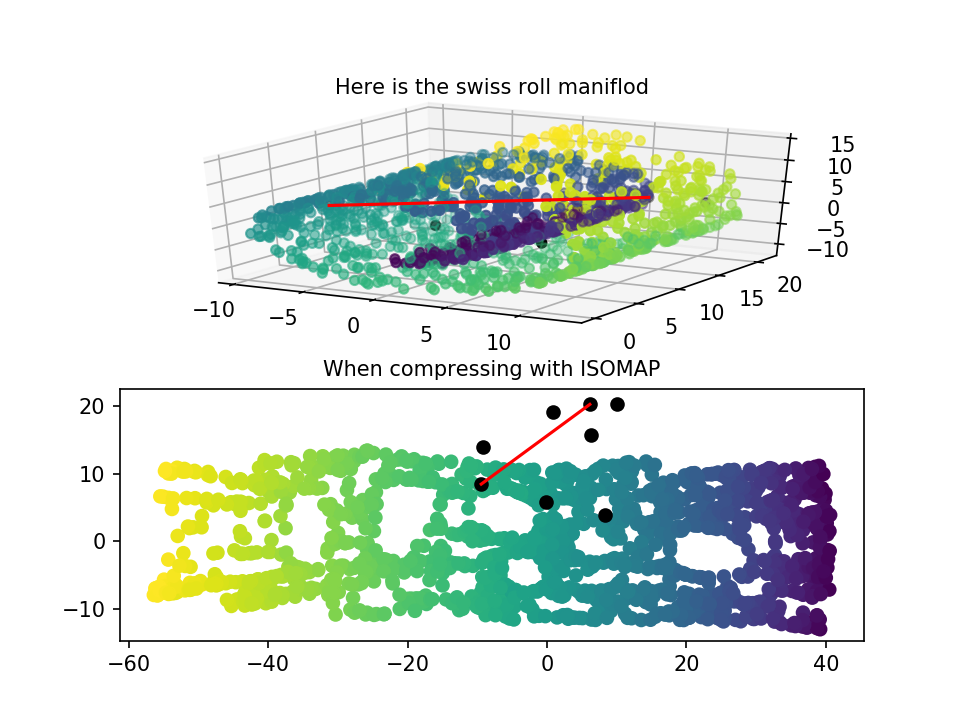

In [18]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = color)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Now let us generate swiss roll data for 300 samples with some noise in it

In [19]:
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)

In [20]:
ndata.shape

(300, 3)

#### Lets concatenate the noise data values and original data values

In [21]:
import numpy as np
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)

In [22]:
con_data

array([[ 10.63333203,  13.14609975,   7.82231253],
       [ -9.44579794,   9.13387679,  -1.7676998 ],
       [  0.79183142,  19.13075187,   7.71110429],
       ..., 
       [  3.48136951,   1.27787196,   5.9074364 ],
       [  2.9325495 ,   6.49919373,  11.64494371],
       [ -5.95831824,  11.58693393,   4.32609795]])

In [23]:
con_data.shape

(1800, 3)

In [24]:
## Let us apply isomap on this data
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

In [25]:
manifold_data.shape

(1800, 2)

#### Let us plot the data

<IPython.core.display.Javascript object>


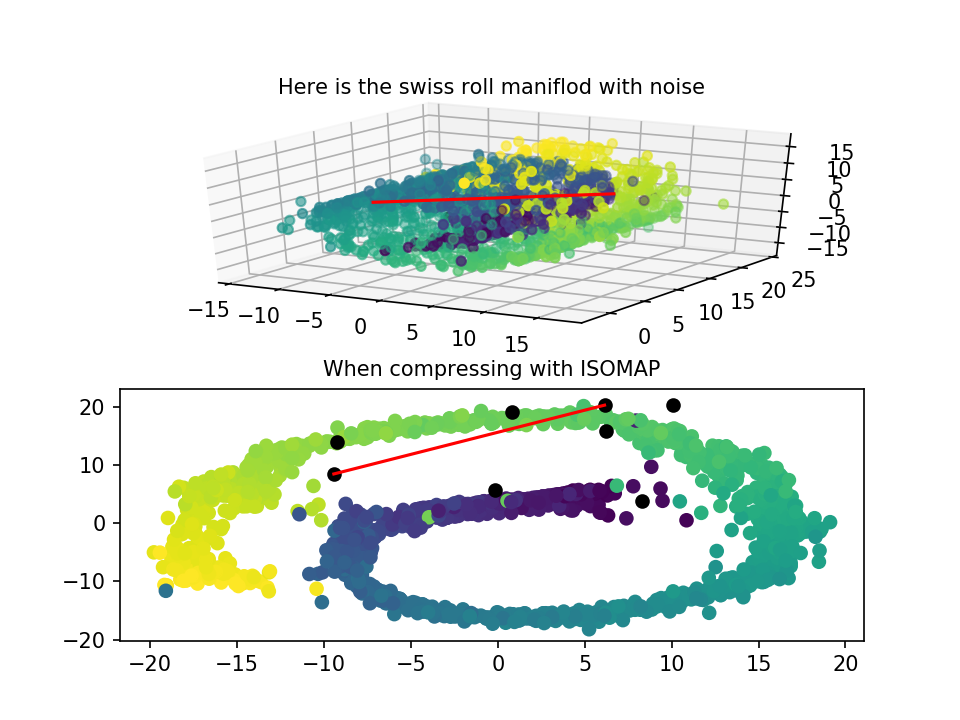

In [26]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

**Excerise 1 :** Pan and Zoom to observe the plots

**Summary:**  ISOMAP has the basic idea of preserve geodesic distance as measured along the manifold, hence can flatten (unroll) the swiss roll. 